In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engineering-placements-prediction/collegePlace.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [3]:
place_df = pd.read_csv('../input/engineering-placements-prediction/collegePlace.csv')
place_df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
place_df.shape

(2966, 8)

In [5]:
place_df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [6]:
figure = px.bar(place_df, x = 'PlacedOrNot' , y='HistoryOfBacklogs')
figure.show()

In [7]:
figure = px.bar(place_df, x = 'Stream' , y='PlacedOrNot' , color='Stream')
figure.show()

In [8]:
figure = px.bar(place_df, x = 'CGPA' , y='PlacedOrNot' , color='CGPA')
figure.show()

<AxesSubplot:>

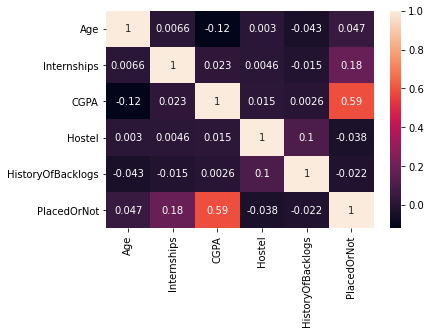

In [9]:
sns.heatmap(place_df.corr(), annot = True)

In [10]:
from pandas_profiling import ProfileReport

In [11]:
Placement_Details = ProfileReport(place_df ,title = "Pandas Profiling Report of Placement")
Placement_Details.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
one_hot = pd.get_dummies(place_df, columns = ['Gender' ,'Stream'])
one_hot.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1


In [13]:
new_place_df = one_hot
new_place_df.columns

Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'PlacedOrNot', 'Gender_Female', 'Gender_Male', 'Stream_Civil',
       'Stream_Computer Science', 'Stream_Electrical',
       'Stream_Electronics And Communication', 'Stream_Information Technology',
       'Stream_Mechanical'],
      dtype='object')

In [14]:
new_place_df.isnull().sum()

Age                                     0
Internships                             0
CGPA                                    0
Hostel                                  0
HistoryOfBacklogs                       0
PlacedOrNot                             0
Gender_Female                           0
Gender_Male                             0
Stream_Civil                            0
Stream_Computer Science                 0
Stream_Electrical                       0
Stream_Electronics And Communication    0
Stream_Information Technology           0
Stream_Mechanical                       0
dtype: int64

In [15]:
for i in new_place_df.columns:
    print(new_place_df[i].unique)

<bound method Series.unique of 0       22
1       21
2       22
3       21
4       22
        ..
2961    23
2962    23
2963    22
2964    22
2965    23
Name: Age, Length: 2966, dtype: int64>
<bound method Series.unique of 0       1
1       0
2       1
3       0
4       0
       ..
2961    0
2962    1
2963    1
2964    1
2965    0
Name: Internships, Length: 2966, dtype: int64>
<bound method Series.unique of 0       8
1       7
2       6
3       8
4       8
       ..
2961    7
2962    7
2963    7
2964    7
2965    8
Name: CGPA, Length: 2966, dtype: int64>
<bound method Series.unique of 0       1
1       1
2       0
3       0
4       1
       ..
2961    0
2962    1
2963    0
2964    0
2965    0
Name: Hostel, Length: 2966, dtype: int64>
<bound method Series.unique of 0       1
1       1
2       0
3       1
4       0
       ..
2961    0
2962    0
2963    0
2964    0
2965    0
Name: HistoryOfBacklogs, Length: 2966, dtype: int64>
<bound method Series.unique of 0       1
1       1
2       1
3 

In [16]:
new_place_df.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1


In [17]:
X = new_place_df.drop('PlacedOrNot',1)
y = new_place_df.PlacedOrNot

In [18]:
print(X.head())


   Age  Internships  CGPA  Hostel  HistoryOfBacklogs  Gender_Female  \
0   22            1     8       1                  1              0   
1   21            0     7       1                  1              1   
2   22            1     6       0                  0              1   
3   21            0     8       0                  1              0   
4   22            0     8       1                  0              0   

   Gender_Male  Stream_Civil  Stream_Computer Science  Stream_Electrical  \
0            1             0                        0                  0   
1            0             0                        1                  0   
2            0             0                        0                  0   
3            1             0                        0                  0   
4            1             0                        0                  0   

   Stream_Electronics And Communication  Stream_Information Technology  \
0                                     1   

In [19]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: PlacedOrNot, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
 y,
 random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [23]:
model.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [24]:
model.predict(X)

array([1, 0, 0, ..., 1, 1, 1])

In [25]:
model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [26]:
model.score(X_test,y_test)

0.7951482479784366

In [27]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1327
           1       0.78      0.80      0.79      1639

    accuracy                           0.77      2966
   macro avg       0.76      0.76      0.76      2966
weighted avg       0.77      0.77      0.77      2966



In [28]:
model.score(X,y)

0.7673634524612273

In [29]:
cm = confusion_matrix(y, model.predict(X))

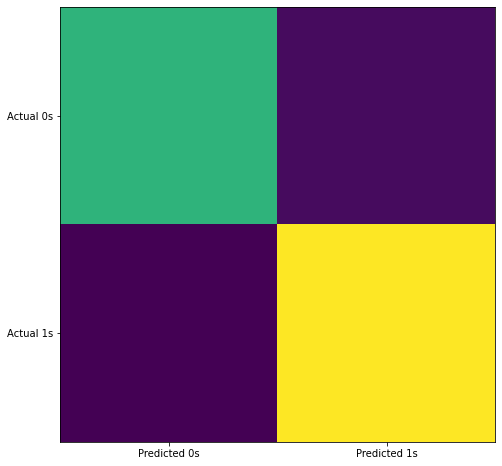

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

In [31]:
from sklearn.metrics import plot_confusion_matrix

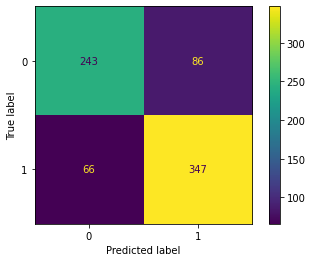

In [32]:
plot_confusion_matrix(model, X_test, y_test)  